In [2]:
# Loading and Understanding the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the Datatset  
df = pd.read_csv('swiggy.csv')

In [8]:
# Display First 5 Rows
df.head() # Shows first 5 rows to get an overview of Data

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [10]:
# Check data types and missing values
df.info()  # Shows column data types, non-null counts
# observation: The Data Does Not have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [12]:
# Summary Statistics of numerical columns
df.describe() # Gives count, mean , std , min , max , etc.
# Observation: The average rating across all products is 3.655

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [14]:
# Check missing values
df.isnull().sum()  # Shows total missing values per column
# observation:The Data Does Not have missing values.

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

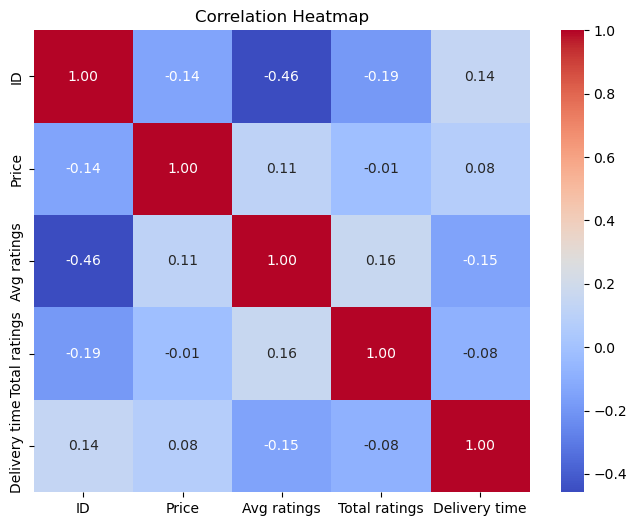

In [20]:
# Remove non-numeric columns before correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Visualization 1: Correlation heatmap to observe relationships between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
# observation: The correlation heatmap shows a strong relationship between numerical features only, avoiding errors with non-numeric data.

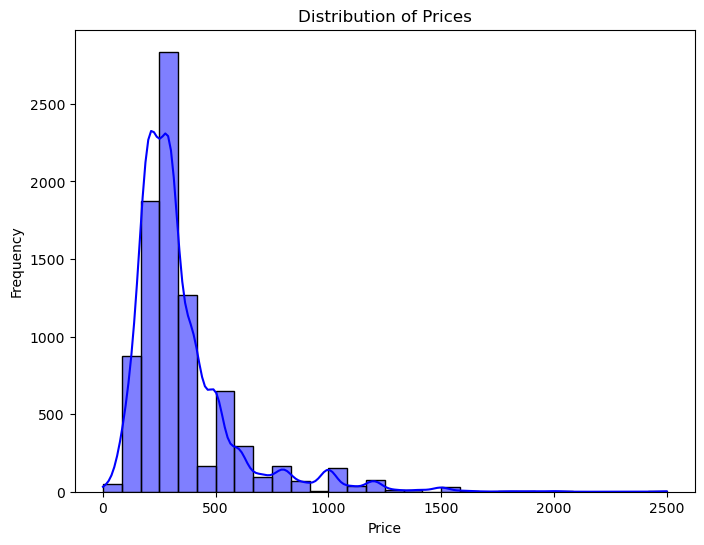

In [22]:
# Visualization 2: Distribution of Prices to analyze how food prices vary
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Prices")
plt.show()
# observation:The histogram suggests that most food prices are within a specific range, with fewer high-priced items.

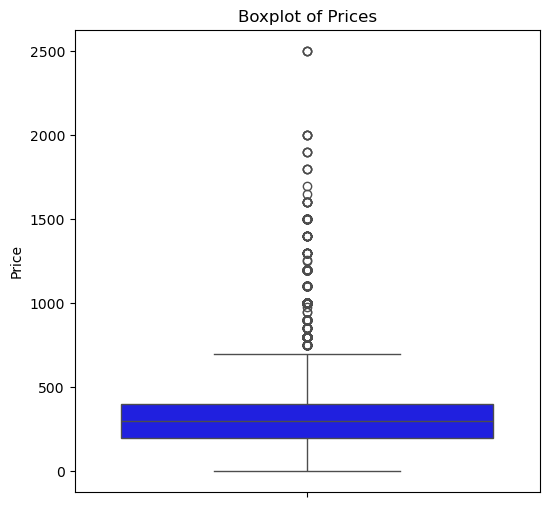

In [24]:
# Visualization 3: Boxplot to check for outliers in pricing
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Price'], color='blue')
plt.title("Boxplot of Prices")
plt.ylabel("Price")
plt.show()
# observation: The boxplot reveals some outliers in the price distribution, indicating premium-priced food items.

C:\Users\HeLL0\AppData\Local\Temp\ipykernel_10540\2594922865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['City'], order=df['City'].value_counts().index, palette='viridis')


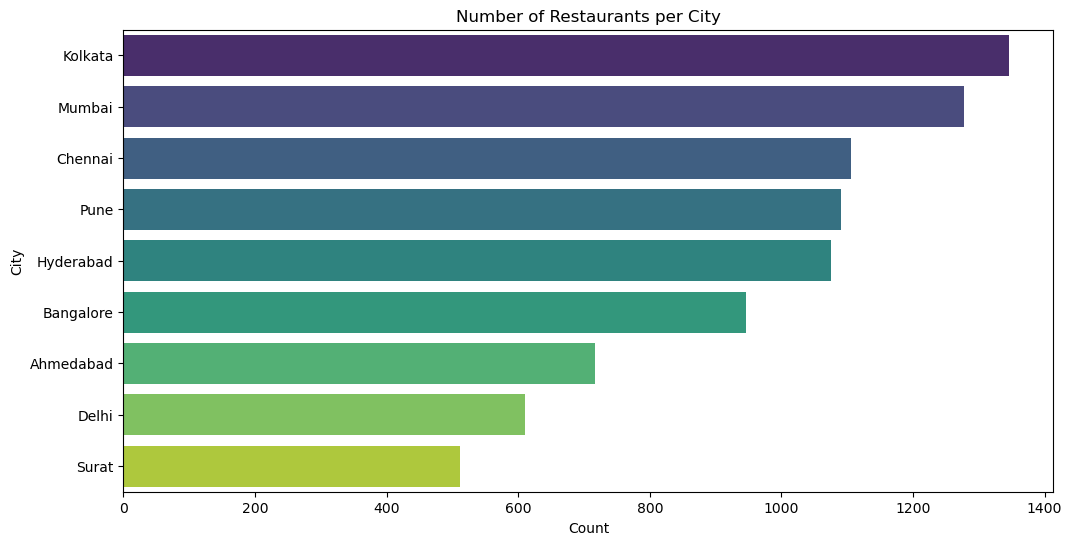

In [26]:
# Visualization 4: Countplot to show the number of restaurants per city
plt.figure(figsize=(12, 6))
sns.countplot(y=df['City'], order=df['City'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("City")
plt.title("Number of Restaurants per City")
plt.show()
# observation: The countplot indicates that some cities have significantly more restaurants listed than others.

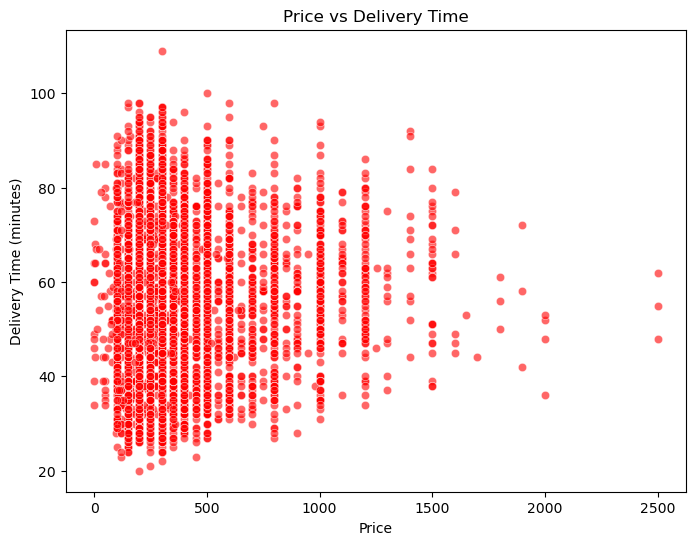

In [28]:
# Visualization 5: Scatter plot showing Price vs Delivery time trend
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Price'], y=df['Delivery time'], alpha=0.6, color='red')
plt.xlabel("Price")
plt.ylabel("Delivery Time (minutes)")
plt.title("Price vs Delivery Time")
plt.show()
# observation: The scatter plot shows that higher prices do not always lead to longer delivery times, suggesting efficient logistics in certain areas.